# Capstone Project - Collisions in Seattle (Week 2)


#### Applied Data Science Capstone by IBM/Coursera

## Data Preparation and Cleaning

The dataset contains collision data collected by the Seattle Department of Transportation from 2004 to 2020.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore") # Supressing annoying warnings :-)
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv("Data-Collisions.csv")
print(df.shape)
df.head()

--2020-09-10 19:21:26--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  37.1MB/s   in 1.9s   

2020-09-10 19:21:28 (37.1 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]

(194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Data has 38 columns and 194673 rows.

Let's see which columns has null values

In [3]:
df.isna().any()

SEVERITYCODE      False
X                  True
Y                  True
OBJECTID          False
INCKEY            False
COLDETKEY         False
REPORTNO          False
STATUS            False
ADDRTYPE           True
INTKEY             True
LOCATION           True
EXCEPTRSNCODE      True
EXCEPTRSNDESC      True
SEVERITYCODE.1    False
SEVERITYDESC      False
COLLISIONTYPE      True
PERSONCOUNT       False
PEDCOUNT          False
PEDCYLCOUNT       False
VEHCOUNT          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE       True
SDOT_COLCODE      False
SDOT_COLDESC      False
INATTENTIONIND     True
UNDERINFL          True
WEATHER            True
ROADCOND           True
LIGHTCOND          True
PEDROWNOTGRNT      True
SDOTCOLNUM         True
SPEEDING           True
ST_COLCODE         True
ST_COLDESC         True
SEGLANEKEY        False
CROSSWALKKEY      False
HITPARKEDCAR      False
dtype: bool

Most columns has missing values. Let's see how many null values each column has

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percentage of null values': percent_missing})
missing_value_df.sort_values('Percentage of null values', ascending=False, inplace=True)
missing_value_df

,Percentage of null values
PEDROWNOTGRNT,97.602646
EXCEPTRSNDESC,97.103861
SPEEDING,95.205807
INATTENTIONIND,84.689710
INTKEY,66.574718
EXCEPTRSNCODE,56.434123
SDOTCOLNUM,40.959455
JUNCTIONTYPE,3.251093
X,2.739979
Y,2.739979


In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Based on our bussiness question, we are interested in columns 'SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOT_COLCODE'

In [6]:
df.drop(df.columns.difference(['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SDOT_COLCODE'])\
, axis=1, inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,2,11,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,2,16,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,3,14,Overcast,Dry,Daylight
3,1,Block,Other,3,3,11,Clear,Dry,Daylight
4,2,Intersection,Angles,2,2,11,Raining,Wet,Daylight


Let's check for null values in the new data

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percentage of null values': percent_missing})
missing_value_df.sort_values('Percentage of null values', ascending=False, inplace=True)
missing_value_df

,Percentage of null values
LIGHTCOND,2.655736
WEATHER,2.610018
ROADCOND,2.574574
COLLISIONTYPE,2.519096
ADDRTYPE,0.989351
SEVERITYCODE,0.000000
PERSONCOUNT,0.000000
VEHCOUNT,0.000000
SDOT_COLCODE,0.000000


We still have some null values. Let's check the percentage of rows with null values.

In [8]:
df_na=df.dropna()
nan_rows = (1 - (df_na.shape[0]/df.shape[0]))*100
print("%.2f" % nan_rows,"% of rows contain null values")

3.68 % of rows contain null values


Considering that 3.68% of rows contains null values, we will drop these rows.

In [9]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head()

(187504, 9)


,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,2,2,11,Overcast,Wet,Daylight
1,1,Block,Sideswipe,2,2,16,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,4,3,14,Overcast,Dry,Daylight
3,1,Block,Other,3,3,11,Clear,Dry,Daylight
4,2,Intersection,Angles,2,2,11,Raining,Wet,Daylight


Let's check to confirm that we dropped all null values

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Percentage of null values': percent_missing})
missing_value_df.sort_values('Percentage of null values', ascending=False, inplace=True)
missing_value_df

,Percentage of null values
SEVERITYCODE,0.0
ADDRTYPE,0.0
COLLISIONTYPE,0.0
PERSONCOUNT,0.0
VEHCOUNT,0.0
SDOT_COLCODE,0.0
WEATHER,0.0
ROADCOND,0.0
LIGHTCOND,0.0


Let's see if the data is balanced or not.

In [11]:
df['SEVERITYCODE'].value_counts()

1    130634
2     56870
Name: SEVERITYCODE, dtype: int64

The data is clearly unbalanced. It is necessary to balance it.

In [12]:
from sklearn.utils import resample

df_code1 = df[df.SEVERITYCODE == 1]
df_code2 = df[df.SEVERITYCODE == 2]

df_sample = resample(df_code1, replace=False, n_samples=df['SEVERITYCODE'].value_counts()[2], random_state=123)
df = pd.concat([df_sample, df_code2])
df.reset_index(drop=True, inplace=True)

df['SEVERITYCODE'].value_counts()

2    56870
1    56870
Name: SEVERITYCODE, dtype: int64

Now the data is balanced and we can proceed.

## Exploratory Analysis 

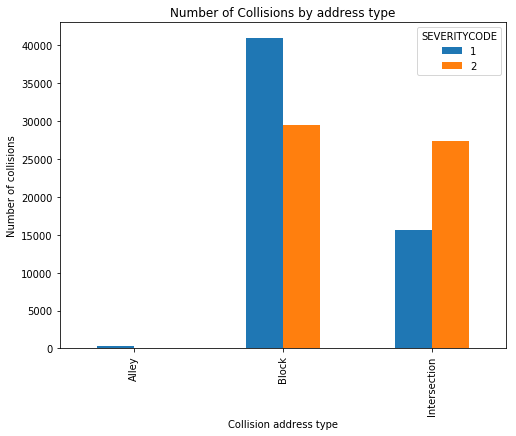

In [13]:
df.groupby(['ADDRTYPE', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(8, 6))
plt.xlabel('Collision address type')
plt.ylabel('Number of collisions')
plt.title('Number of Collisions by address type')
plt.show()

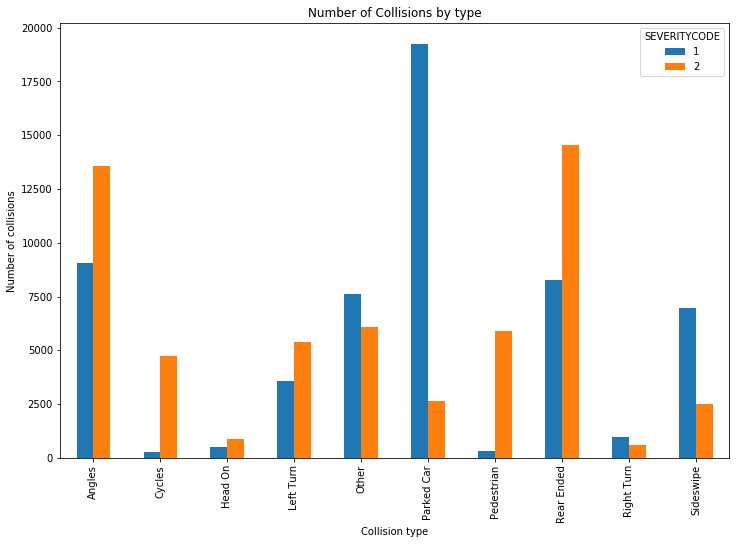

In [14]:
df.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8))
plt.xlabel('Collision type')
plt.ylabel('Number of collisions')
plt.title('Number of Collisions by type')
plt.show()

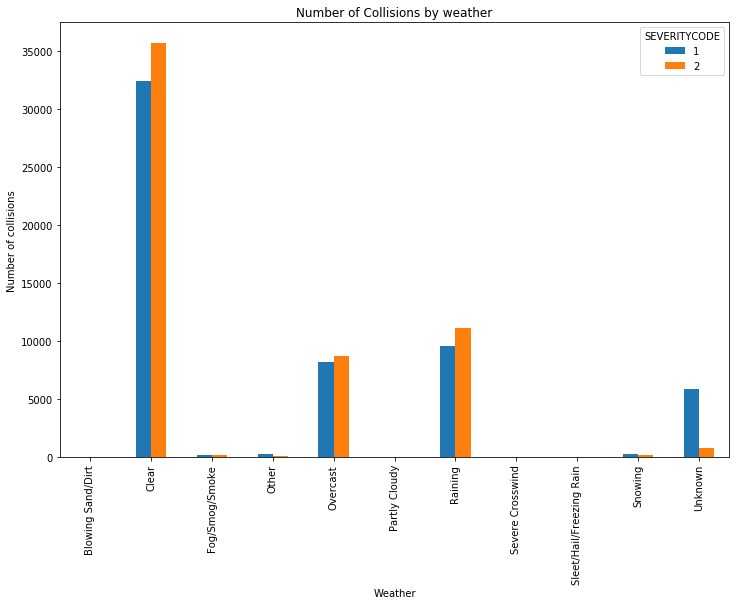

In [15]:
df.groupby(['WEATHER', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8))
plt.xlabel('Weather')
plt.ylabel('Number of collisions')
plt.title('Number of Collisions by weather')
plt.show()

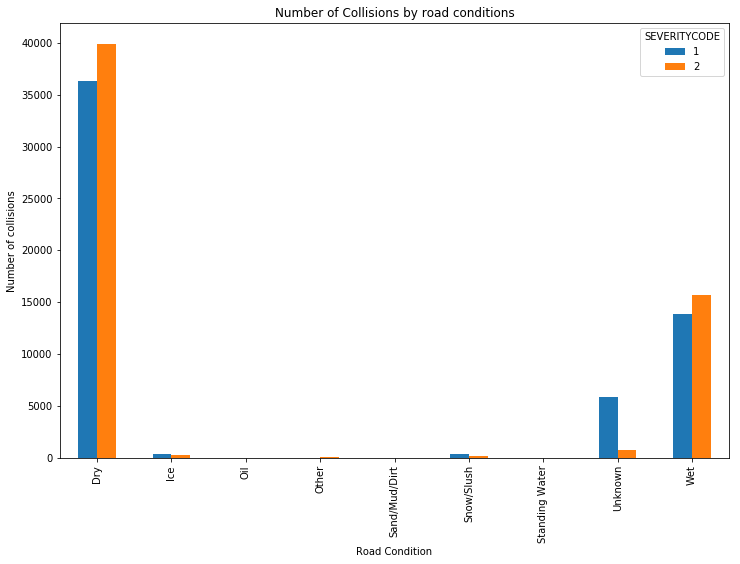

In [16]:
df.groupby(['ROADCOND', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8))
plt.xlabel('Road Condition')
plt.ylabel('Number of collisions')
plt.title('Number of Collisions by road conditions')
plt.show()

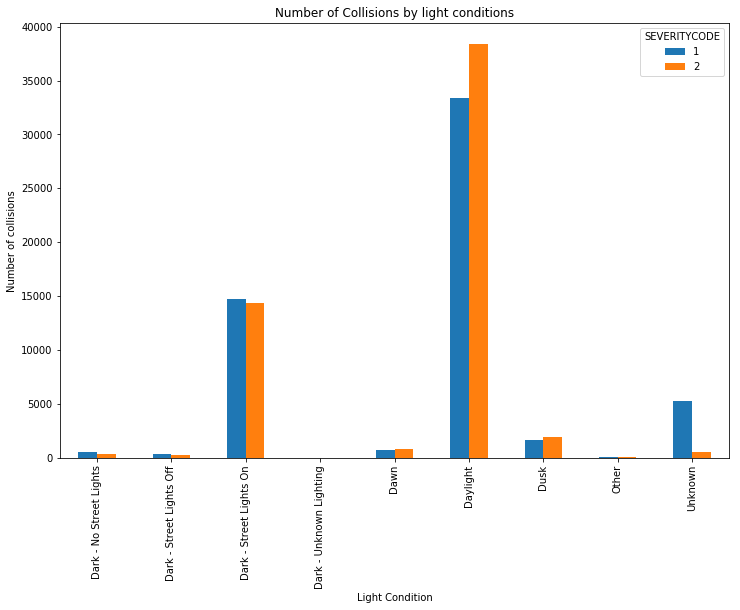

In [17]:
df.groupby(['LIGHTCOND', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8))
plt.xlabel('Light Condition')
plt.ylabel('Number of collisions')
plt.title('Number of Collisions by light conditions')
plt.show()

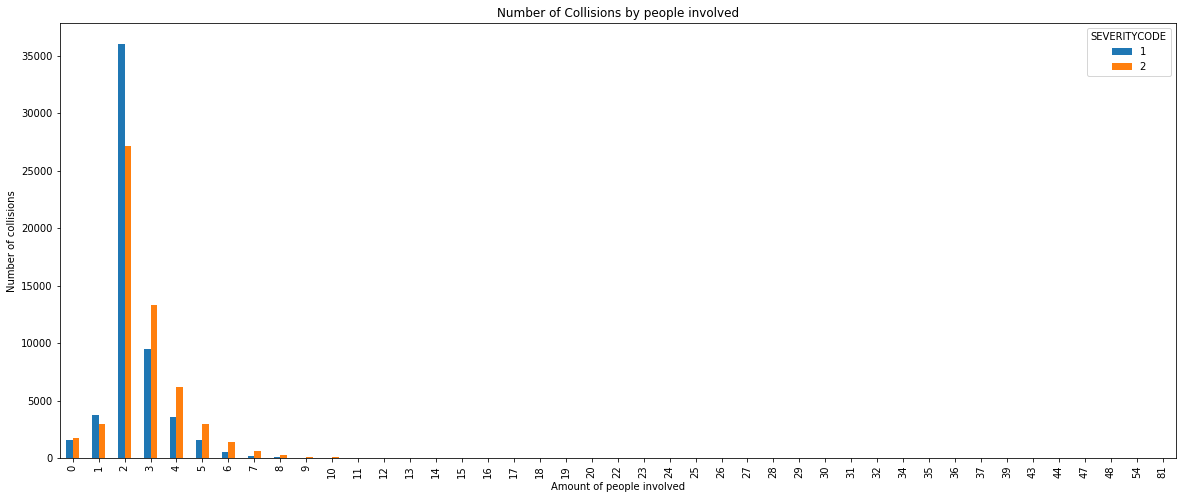

In [18]:
df.groupby(['PERSONCOUNT', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(20, 8))
plt.xlabel('Amount of people involved')
plt.ylabel('Number of collisions')
plt.title('Number of Collisions by people involved')
plt.show()

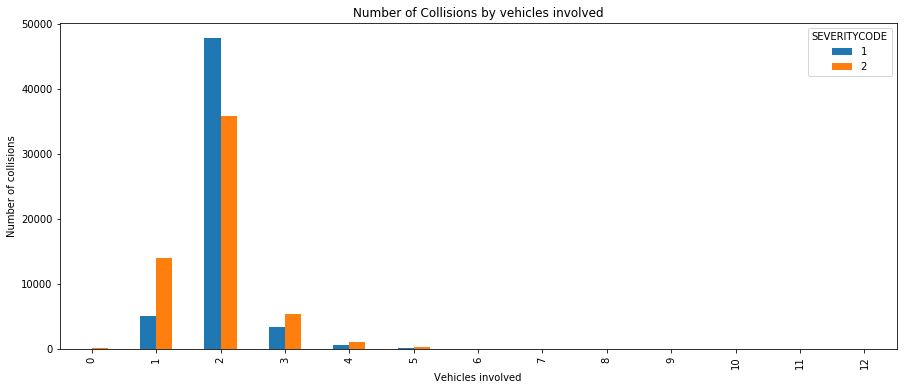

In [19]:
df.groupby(['VEHCOUNT', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(15, 6))
plt.xlabel('Vehicles involved')
plt.ylabel('Number of collisions')
plt.title('Number of Collisions by vehicles involved')
plt.show()

It's clear that we have categorical and numerical data.

## Data Transformation

Let's see the numerical data description

In [20]:
df.describe()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,SDOT_COLCODE
count,113740.000000,113740.000000,113740.00000,113740.000000
mean,1.500000,2.536135,1.95160,14.569712
std,0.500002,1.416513,0.60759,7.323325
min,1.000000,0.000000,0.00000,0.000000
25%,1.000000,2.000000,2.00000,11.000000
50%,1.500000,2.000000,2.00000,14.000000
75%,2.000000,3.000000,2.00000,14.000000
max,2.000000,81.000000,12.00000,69.000000


Let's see the categorical data description.

In [21]:
df.describe(include='O')

,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
count,113740,113740,113740,113740,113740
unique,3,10,11,9,9
top,Block,Rear Ended,Clear,Dry,Daylight
freq,70399,22857,68120,76248,71773


Categorical variables are not suitable for performing quantitative analysis. So, we need to recast them to an appropiate type. So, let's convert them to numerical data using one hot encoding technique.

In [22]:
attributes = df[['ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
Feature = pd.concat([pd.get_dummies(attributes), df[['VEHCOUNT', 'PERSONCOUNT', 'SDOT_COLCODE']]], axis=1)
Feature.head()

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,...,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown,VEHCOUNT,PERSONCOUNT,SDOT_COLCODE
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,28
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,2,14
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,2,2,13
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,3,3,11
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,2,2,16


In [23]:
X=Feature
y=df['SEVERITYCODE'].values

print("X shape:",X.shape)
print ("y shape:", y.shape)

X shape: (113740, 45)
y shape: (113740,)


Normalize the data.

In [24]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

Now the data is clean and ready to start the analysis.

## Modeling
The goal of this section is to predict the target variable. Since we want to know if an accident severity will be 1 or 2, we are going to consider classification algorithms.  

### Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90992, 45) (90992,)
Test set: (22748, 45) (22748,)


### K-Nearest Neighbours (KNN)
We are going to consider just two clusters, since the target variable has two values and it doesn't make sense to have more clusters than that.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 2
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6480459820643573
Test set Accuracy:  0.6241867416915773


In [27]:
print("F1-Score of KNN is : ", metrics.f1_score(y_test, yhat, average='macro'))
print("Jaccard Score of KNN is : ", metrics.jaccard_similarity_score(y_test, yhat))

F1-Score of KNN is :  0.6089307637818681
Jaccard Score of KNN is :  0.6241867416915773


### Decision Tree

In [31]:
maxDepth= 50
dmean_acc = np.zeros((maxDepth-1))
std_acc = np.zeros((maxDepth-1))
for n in range(1,maxDepth):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    tree.fit(X_train,y_train)
    prediction = tree.predict(X_test)
    dmean_acc[n-1] = metrics.accuracy_score(y_test, prediction)    
    std_acc[n-1]=np.std(prediction==y_test)/np.sqrt(prediction.shape[0])

print('The best accuracy was:', dmean_acc.max(), "with max depth =", dmean_acc.argmax()+1) 

The best accuracy was: 0.7120186390012309 with max depth = 11


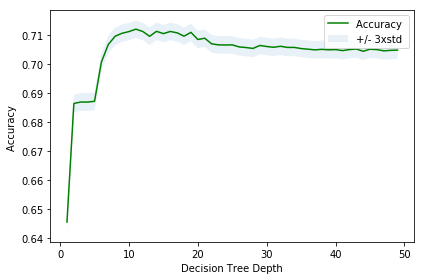

In [32]:
plt.plot(range(1,maxDepth),dmean_acc,'g')
plt.fill_between(range(1,maxDepth),dmean_acc - 1 * std_acc,dmean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Decision Tree Depth')
plt.tight_layout()
plt.show()

In [33]:
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth = dmean_acc.argmax()+1)
dt_model.fit(X_train,y_train)
dt_yhat = dt_model.predict(X_test)

print("Train set Accuracy:", metrics.accuracy_score(y_train, dt_model.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, dt_yhat))

Train set Accuracy: 0.7157222612976964
Test set Accuracy: 0.7120186390012309


In [34]:
print("F1-Score of Decision Tree is : ", metrics.f1_score(y_test, dt_yhat, average='macro'))
print("Jaccard Score of Decision Tree is : ", metrics.jaccard_similarity_score(y_test, dt_yhat))

F1-Score of Decision Tree is :  0.7070005538144505
Jaccard Score of Decision Tree is :  0.7120186390012309


### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR_yhat = LR.predict(X_test)
LR_prob = LR.predict_proba(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Function given in Machine Learning with Python Week 3: SVM Lab
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.75      0.61      0.68     11381
           2       0.67      0.80      0.73     11367

   micro avg       0.71      0.71      0.71     22748
   macro avg       0.71      0.71      0.70     22748
weighted avg       0.71      0.71      0.70     22748

Confusion matrix, without normalization
[[6995 4386]
 [2305 9062]]


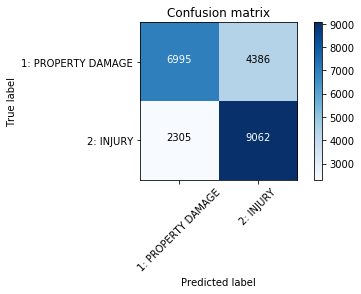

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, LR_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print(classification_report(y_test, LR_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1: PROPERTY DAMAGE', '2: INJURY'],normalize= False,  title='Confusion matrix')

In [38]:
print("F1-Score of Logistic Regression is : ", metrics.f1_score(y_test, LR_yhat, average='macro'))
print("Jaccard Score of Logistic Regression is : ", metrics.jaccard_similarity_score(y_test, LR_yhat))
print("LogLoss of Logistic Regression is : ", metrics.log_loss(y_test, LR_prob))

F1-Score of Logistic Regression is :  0.7034155102577506
Jaccard Score of Logistic Regression is :  0.7058642518023562
LogLoss of Logistic Regression is :  0.5389010199244794


### Support Vector Machine (SVM)

In [39]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
svm_yhat = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.74      0.64      0.69     11381
           2       0.68      0.78      0.73     11367

   micro avg       0.71      0.71      0.71     22748
   macro avg       0.71      0.71      0.71     22748
weighted avg       0.71      0.71      0.71     22748

Confusion matrix, without normalization
[[7228 4153]
 [2482 8885]]


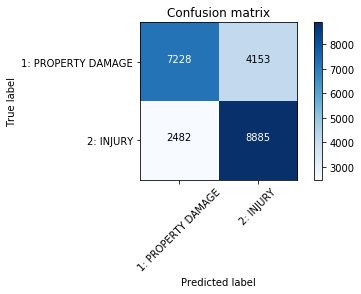

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_yhat, labels=[1,2])
np.set_printoptions(precision=2)

print(classification_report(y_test, svm_yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1: PROPERTY DAMAGE', '2: INJURY'],normalize= False,  title='Confusion matrix')

In [41]:
print("SVM's Jaccard Value: ", round(metrics.jaccard_similarity_score(y_test, svm_yhat),2))
print("SVM's F1-score: ", round(metrics.f1_score(y_test, svm_yhat, average='weighted'),2))

SVM's Jaccard Value:  0.71
SVM's F1-score:  0.71


### Model Evaluation

| Algorithm           | F1-Score | Jaccard | Log Loss |
|---------------------|----------|---------|----------|
| KNN                 |   0.61   |   0.62  |    NA    |
| Decision Tree       |   0.71   |   0.71  |    NA    |
| Logistic Regression |   0.70   |   0.71  |   0.54   |
| SVM                 |   0.71   |   0.71  |    NA    |

### Conclusion
According to the model results, Decision Tree and Support Vector Machine algorithms have the best performance for a classification algorithm. Logistic Regression has a similar performance, with no significance variation. Considering this, these algorithms (Decision Tree, SVM and Logistic Regression) can be used by the Seattle government to predict collision severity.